In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
vc = CountVectorizer()

In [3]:
vc.fit(["Thor Hathodawala is looking for a job"])

CountVectorizer()

In [4]:
vc.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [5]:
vc.vocabulary

In [6]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [7]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

We will not take a simple collection of text documents, preprocess them to remove stop words, lemmatize etc and then generate bag of 1 grams and 2 grams from it

In [8]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [9]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    filtered_token = []
    doc = nlp(text)
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
        
    return " ".join(filtered_token)
        

In [10]:
preprocess('Thor ate pizza')

'thor eat pizza'

In [11]:
preprocess('Loki is eating pizza')

'Loki eat pizza'

In [12]:
corpus_processed  =  ([preprocess(i) for i in corpus])

In [13]:
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [14]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

Now generate bag of n gram vector for few sample documents

In [15]:
v.transform(["Thor eat pizza"])

<1x9 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [16]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

Let's take a document that has out of vocabulary (OOV) term and see how bag of ngram generates vector out of it

In [17]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [1]:
## News Category Classification Problem



In [18]:
import pandas as pd

df = pd.read_json('news_dataset.json')
print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [19]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [20]:
min_samples = 1381

In [21]:
df_bus = df[df['category'] == 'BUSINESS'].sample(min_samples, random_state=1)
df_spt = df[df['category'] == 'SPORTS'].sample(min_samples, random_state=1)
df_crm = df[df['category'] == 'CRIME'].sample(min_samples, random_state=1)
df_sc = df[df['category'] == 'SCIENCE'].sample(min_samples, random_state=1)

In [22]:
df_bus

,text,category
9625,Taking Your Startup Public Is Fraught With Neg...,BUSINESS
7958,Women in Business: Q&A with Donna Josephson Ch...,BUSINESS
691,Ladies From the Shark Tank Excellent advice fr...,BUSINESS
4905,Farmer Forced To Dump Insane Amount Of Gorgeou...,BUSINESS
8899,Why You Should Care About The Backlash Against...,BUSINESS
...,...,...
9417,Will Uber's New 'Drivers Association' Have Any...,BUSINESS
11382,Here's Why You Hate Work,BUSINESS
9903,How Managers Can Hire Employees More Effectively,BUSINESS
12081,Rethinking Values in the Workplace,BUSINESS


In [23]:
df_bal = pd.concat([df_bus,df_spt,df_crm,df_sc],axis=0)

In [24]:
df_bal

,text,category
9625,Taking Your Startup Public Is Fraught With Neg...,BUSINESS
7958,Women in Business: Q&A with Donna Josephson Ch...,BUSINESS
691,Ladies From the Shark Tank Excellent advice fr...,BUSINESS
4905,Farmer Forced To Dump Insane Amount Of Gorgeou...,BUSINESS
8899,Why You Should Care About The Backlash Against...,BUSINESS
...,...,...
6604,What A Dust Devil Looks Like On Mars The image...,SCIENCE
8232,Scientists Offer Plan To Hide Earth From Advan...,SCIENCE
9928,"Sorry, But Cinderella's Glass Slippers Would'v...",SCIENCE
2153,New NASA Photo Shows A Crescent Pluto In All I...,SCIENCE


In [25]:
df_bal['category'].value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
Lb = LabelEncoder()

In [87]:
# cat_tr = Lb.fit_transform(df_bal['category'])

In [88]:
# cat_col = pd.DataFrame(cat_tr)

In [89]:
# cat_col

In [90]:
# type(cat_col)

In [91]:
# cat_col[0].dtype

In [92]:
# df_bal = pd.concat([df_bal, cat_col], axis = 1)

In [93]:
# df_bal = df_bal.rename(columns={0:"Cat"})

In [28]:
df_bal

,text,category
9625,Taking Your Startup Public Is Fraught With Neg...,BUSINESS
7958,Women in Business: Q&A with Donna Josephson Ch...,BUSINESS
691,Ladies From the Shark Tank Excellent advice fr...,BUSINESS
4905,Farmer Forced To Dump Insane Amount Of Gorgeou...,BUSINESS
8899,Why You Should Care About The Backlash Against...,BUSINESS
...,...,...
6604,What A Dust Devil Looks Like On Mars The image...,SCIENCE
8232,Scientists Offer Plan To Hide Earth From Advan...,SCIENCE
9928,"Sorry, But Cinderella's Glass Slippers Would'v...",SCIENCE
2153,New NASA Photo Shows A Crescent Pluto In All I...,SCIENCE


In [29]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5524 entries, 9625 to 9574
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      5524 non-null   object
 1   category  5524 non-null   object
dtypes: object(2)
memory usage: 129.5+ KB


In [32]:
#  df_bal['Cat'].value_counts()

In [97]:
# df_bal.iloc[5511]

In [98]:
# df_bal['Cat'].dtype

In [99]:
# df_bal["Cat"] = df_bal['Cat'].astype(int)

In [30]:
df_bal.head(100)

,text,category
9625,Taking Your Startup Public Is Fraught With Neg...,BUSINESS
7958,Women in Business: Q&A with Donna Josephson Ch...,BUSINESS
691,Ladies From the Shark Tank Excellent advice fr...,BUSINESS
4905,Farmer Forced To Dump Insane Amount Of Gorgeou...,BUSINESS
8899,Why You Should Care About The Backlash Against...,BUSINESS
...,...,...
11483,Subjugation In Steel One cost of freedom is st...,BUSINESS
5197,America Is Globally Shamed For Its Pathetic Mi...,BUSINESS
7538,Elon Musk Biographer Calls Wall Street Cynicis...,BUSINESS
4677,"Why Goals Are Landmarks Meant to Be Passed, No...",BUSINESS


In [38]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_bal['category_num'] = df_bal['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [39]:
df_bal

,text,category,category_num
9625,Taking Your Startup Public Is Fraught With Neg...,BUSINESS,0
7958,Women in Business: Q&A with Donna Josephson Ch...,BUSINESS,0
691,Ladies From the Shark Tank Excellent advice fr...,BUSINESS,0
4905,Farmer Forced To Dump Insane Amount Of Gorgeou...,BUSINESS,0
8899,Why You Should Care About The Backlash Against...,BUSINESS,0
...,...,...,...
6604,What A Dust Devil Looks Like On Mars The image...,SCIENCE,3
8232,Scientists Offer Plan To Hide Earth From Advan...,SCIENCE,3
9928,"Sorry, But Cinderella's Glass Slippers Would'v...",SCIENCE,3
2153,New NASA Photo Shows A Crescent Pluto In All I...,SCIENCE,3


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_bal['text'], df_bal['category_num'], test_size=0.2, 
    random_state=2022,
    stratify=df_bal['category_num']
)

In [41]:
print(X_train.shape)
X_train.head()

(4419,)


6071            Scientists Discover Tiniest Hedgehog Ever 
4738     Mystery Of 'Britain's Oldest Brain' Finally So...
10604    Notre Dame, Georgia Lead Nation in Most Expens...
4924     Pilot Killed After Hospital Helicopter Crashes...
2237     18-Year-Old Indiana Man Arrested For Planning ...
Name: text, dtype: object

In [42]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

# 1-gram (Bag Of Words (BOW) model)

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# #1. create a pipeline object

cv = CountVectorizer(ngram_range=(1,1))
model = MultinomialNB()

pipe = make_pipeline( cv, model )

#2. fit with X_train and y_train
pipe.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = pipe.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       276
           1       0.91      0.88      0.90       277
           2       0.91      0.85      0.88       276
           3       0.90      0.84      0.87       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



In [44]:
from sklearn.metrics import accuracy_score

In [46]:
acc_sc = accuracy_score(y_pred, y_test)
print(acc_sc)

0.8714932126696833


In [47]:
X_test[:5]

12661    Weinstein Company To Seek Bankruptcy After Las...
10334    Penguins Find Their Moment In The Spotlight Wi...
2255     Get Used To Nor'easters — Arctic Warming May M...
5764      This Is What The Future Of Fast Food Looks Like 
4826     Catholic Priest Convicted Of Sexually Assaulti...
Name: text, dtype: object

In [48]:
y_test[:5]

12661    0
10334    3
2255     3
5764     0
4826     2
Name: category_num, dtype: int64

In [49]:
y_pred[:5]

array([0, 3, 3, 3, 2], dtype=int64)

# Use 1-gram and bigrams

In [50]:
cv = CountVectorizer(ngram_range=(1,2))
model = MultinomialNB()
pipe = make_pipeline( cv, model )
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       276
           1       0.92      0.83      0.87       277
           2       0.91      0.84      0.87       276
           3       0.92      0.79      0.85       276

    accuracy                           0.85      1105
   macro avg       0.86      0.85      0.85      1105
weighted avg       0.87      0.85      0.85      1105



In [51]:
acc_sc = accuracy_score(y_pred, y_test)
print(acc_sc)

0.8506787330316742


In [52]:
cv = CountVectorizer(ngram_range=(1,3))
model = MultinomialNB()
pipe = make_pipeline( cv, model )
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       276
           1       0.92      0.83      0.87       277
           2       0.90      0.84      0.87       276
           3       0.92      0.78      0.84       276

    accuracy                           0.84      1105
   macro avg       0.86      0.84      0.84      1105
weighted avg       0.86      0.84      0.84      1105



In [53]:
acc_sc = accuracy_score(y_pred, y_test)
print(acc_sc)

0.8416289592760181


# text pre-processing to remove stop words, punctuations and apply lemmatization


In [54]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    filtered_token = []
    doc = nlp(text)
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
        
    return " ".join(filtered_token)

In [55]:
df_bal['preprocessed_txt'] = df_bal['text'].apply(preprocess) 

In [56]:
df_bal

,text,category,category_num,preprocessed_txt
9625,Taking Your Startup Public Is Fraught With Neg...,BUSINESS,0,take Startup public fraught negative old day e...
7958,Women in Business: Q&A with Donna Josephson Ch...,BUSINESS,0,woman business Q&A Donna Josephson Chief Marke...
691,Ladies From the Shark Tank Excellent advice fr...,BUSINESS,0,lady Shark Tank Excellent advice lady continue...
4905,Farmer Forced To Dump Insane Amount Of Gorgeou...,BUSINESS,0,Farmer force dump Insane Gorgeous Cherries che...
8899,Why You Should Care About The Backlash Against...,BUSINESS,0,care Backlash Holiday Creep term holiday creep...
...,...,...,...,...
6604,What A Dust Devil Looks Like On Mars The image...,SCIENCE,3,Dust Devil look like Mars image world
8232,Scientists Offer Plan To Hide Earth From Advan...,SCIENCE,3,scientist offer plan hide earth Advanced Space...
9928,"Sorry, But Cinderella's Glass Slippers Would'v...",SCIENCE,3,sorry Cinderella Glass Slippers shatter spoile...
2153,New NASA Photo Shows A Crescent Pluto In All I...,SCIENCE,3,New NASA Photo show Crescent Pluto glory backl...


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_bal['preprocessed_txt'], df_bal['category_num'], test_size=0.2, 
    random_state=2022,
    stratify=df_bal['category_num']
)

In [58]:
cv = CountVectorizer(ngram_range=(1,3))
model = MultinomialNB()
pipe = make_pipeline( cv, model )
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       276
           1       0.91      0.89      0.90       277
           2       0.89      0.91      0.90       276
           3       0.92      0.82      0.87       276

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105



In [59]:
cv = CountVectorizer(ngram_range=(1,2))
model = MultinomialNB()
pipe = make_pipeline( cv, model )
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       276
           1       0.91      0.90      0.90       277
           2       0.89      0.91      0.90       276
           3       0.91      0.83      0.87       276

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105



# COMPARISION KARLO

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[252,   4,  12,   8],
       [ 10, 248,   9,  10],
       [ 14,   7, 251,   4],
       [ 24,  13,  11, 228]], dtype=int64)

Text(69.0, 0.5, 'Truth')

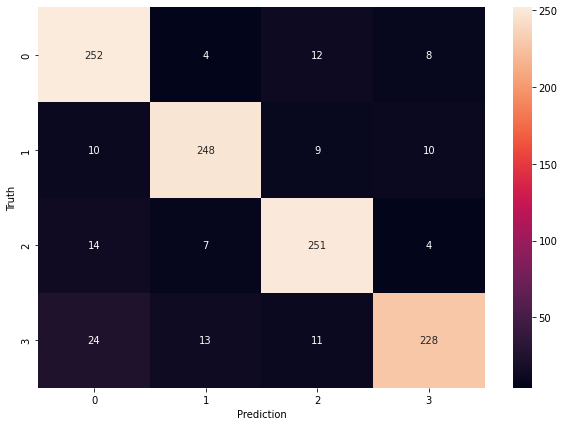

In [61]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Using TD_IDF instead of Count VEctorizer

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72       276
           1       0.83      0.75      0.79       277
           2       0.86      0.74      0.79       276
           3       0.88      0.65      0.75       276

    accuracy                           0.76      1105
   macro avg       0.79      0.76      0.76      1105
weighted avg       0.79      0.76      0.76      1105



In [126]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       276
           1       0.91      0.88      0.90       277
           2       0.87      0.91      0.89       276
           3       0.91      0.84      0.88       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105

